럭키백에 들어있는 생선의 확률을 알기 위해서 프로그램을 짜야한다면 어떤 알고리즘을 사용해야 하는가?

확률은 숫자니까 회귀 문제인가? 아니면 생선을 분류하니까 분류 문제인가?



In [ ]:
# 우선 K 최근접 이웃으로 한번 검증해보자
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')
display(fish.head())
display(pd.unique(fish['Species']))

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [ ]:
# 어종을 맞춰야 하니 Species를 빼고 나머지 특성을 자료로 입력
# 답은 어종으로 target에 넣는다.
fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy()
print(fish_input[:5])
fish_target = fish['Species'].to_numpy()
print(fish_target[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]
['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [ ]:
# 표준화 전 처리
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 확률 예측
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 샘플 5개의 값 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=4)) # 소수점 4자리까지 표기, 5자리에서 반올림

# 결과 4번째
# [Bream에 대한 확률, Parkki에 대한 확률, Perch에 대한 확률, Roach에 대한 확률...]
# [0.     0.     0.6667 0.     0.3333 0.     0.    ] 

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]


In [ ]:
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


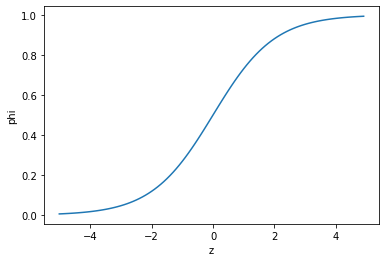

In [ ]:
# 로지스틱 회귀 (logistic regression)은 이름은 회귀이지만 분류 모델
# 선형 방정식을 학습하는 알고리즘 
# 로지스틱 함수 = 시그모이드 함수라고도 불린다.

import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-5, 5, 0.1) # -5부터 5까지, 0.1씩 늘어나는 리스트

# 시그모이드 함수 식
# 자연상수(e)를 사용하여 공식을 푼다. 1 / 1 - (e^-z)
phi = 1/ (1 + np.exp(-z))
plt.plot(z, phi)
plt.xlabel('z')
plt.ylabel('phi')
plt.show()


In [ ]:
# boolean indexing을 이용하여 행을 선택하는 예시
char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# LogisticRegression 클래스를 통해 로지스틱 회귀 모델을 사용한다. 
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

from sklearn.linear_model import LogisticRegression
lr  = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# bream을 선택할 확률, smelt를 선택할 확률을 샘플 5개로 확인
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


In [ ]:
# 로지스틱 회귀로 학습한 계수 확인
print(lr.coef_, lr.intercept_)

# [[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]
# 로지스틱 회귀가 학습한 방정식
# -0.404 * weight - 0.576 * Length - 0.663 * Diagonal - 1.013 * height - 0.732 * width - 2.161

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


In [ ]:
# 5개의 샘플로 z값을 계산하기
# 이 z값을 시그모이드 함수에 통과시키면 확률을 구할 수 있다.
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


In [ ]:
# 이제 확률을 구해보자
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


지금까지 Bream인지 Smelt인지 2중에 1개를 선택하는 이진 분류를 하였다.
하지만 우리는 이제 7가지 생선에 대하여 다중 분류를 해야 한다.

In [ ]:
# 로지스틱 회귀로 다중 분류 수행하기
# C는 규제 변수이며, alpha와는 반대로 작을수록 규제가 커진다. C의 기본값은 1이다.
# max_iter 실행 힛수
lr = LogisticRegression(C=20, max_iter=1000) 
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))
print(lr.predict(test_scaled[:5]))

0.9327731092436975
0.925
['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
# 7가지 생선에 대한 각각 확률을 확인한다.

print(lr.classes_)
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3))

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


In [ ]:
# 소프트맥스 함수란?
# 여러 개의 선형 방정식의 출력값이 0 ~ 1이며, 모든 확률이 전체 합이 1
# 정규화된 지수 함수라고도 불린다.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 지금까지 이중분류는 시그모이드 함수를 사용하였고,
# 다중 분류는 소프트 맥스를 사용하여 구했다.

# 이제 decision_function을 사용하여 z1 ~ z7의 값을 구하고, 스프트맥스를 사용하여 확률을 바꾸어 보자
decision  = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]
[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
